In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
conv_base.trainable = False

In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
batch_size = 10

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
val_generator=test_datagen.flow_from_directory(
        './data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
)



Found 148 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


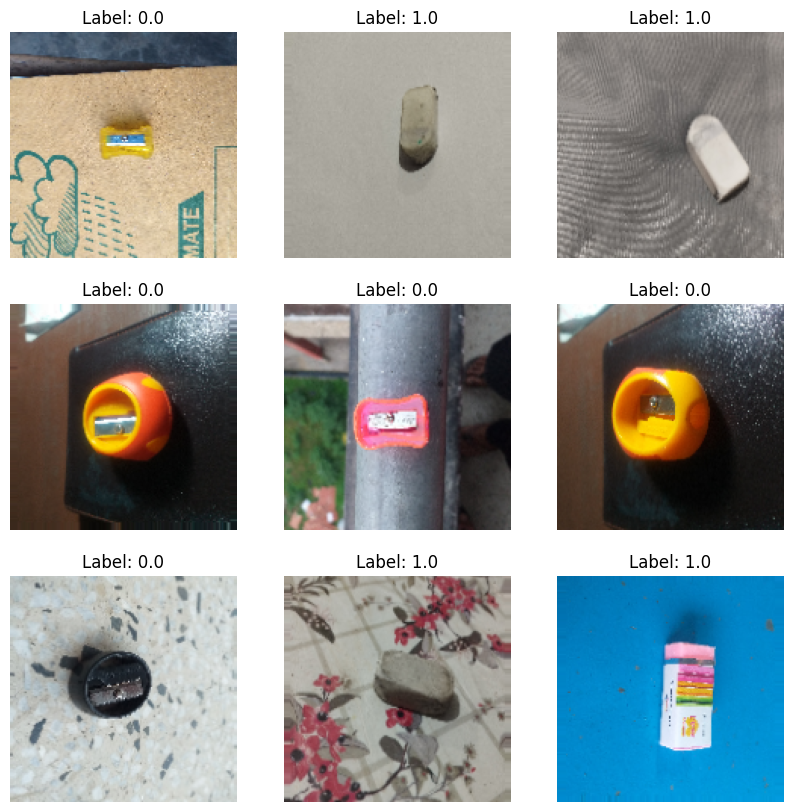

In [7]:
images, labels = train_generator.next()

# Plot the images and corresponding labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title('Label: {}'.format(labels[i]))
    plt.axis('off')
plt.show()

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=val_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_16000\1436160700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
15/15 [==============================] - 115s 7s/step - loss: 0.7267 - accuracy: 0.7162 - val_loss: 0.3000 - val_accuracy: 0.8571
Epoch 2/10
15/15 [==============================] - 82s 5s/step - loss: 0.1650 - accuracy: 0.9324 - val_loss: 0.3751 - val_accuracy: 0.7857
Epoch 3/10
15/15 [==============================] - 79s 5s/step - loss: 0.0843 - accuracy: 0.9595 - val_loss: 1.0122 - val_accuracy: 0.7143
Epoch 4/10
15/15 [==============================] - 69s 5s/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 1.0374 - val_accuracy: 0.7143
Epoch 5/10
15/15 [==============================] - 84s 6s/step - loss: 0.0275 - accuracy: 0.9865 - val_loss: 0.5446 - val_accuracy: 0.7857
Epoch 6/10
15/15 [==============================] - 79s 5s/step - loss: 0.0194 - accuracy: 0.9932 - val_loss: 0.3898 - val_accuracy: 0.8571
Epoch 7/10
15/15 [==============================] - 75s 5s/step - loss: 0.0565 - accuracy: 0.9730 - val_loss: 0.2521 - val_accuracy: 0.9286
Epoch 8/10
15/15 [=

In [16]:
#test image
import cv2
image=cv2.imread('r1.jpeg')
test_img = cv2.resize(image,(150,150))
test_input = test_img.reshape((1,150,150,3))
prediction = model.predict(test_input)

if prediction[0][0]>=0.5:
    label=1
else:
    label=0
print("Label:", label)

1/1 [==============================] - 0s 353ms/step
Label: 0
